In [163]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
import numpy as np
import pandas as pd
# from mlxtend.frequent_patterns import apriori, association_rules
from apyori import apriori
import random

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
data = pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv', header=None)
data = data.fillna(0)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
temperature_list = []
for i in range(0,7501):
    temperature = random.randint(1,60)
    formatted_temp = str(temperature).zfill(2)
    temperature_list.append(formatted_temp)

data.insert(0,"temp",temperature_list)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
season_list = []

def tempToSeasons(temp_data):
    season_category = str()
    if temp_data<=0:
        season_category = "Extreme Cold"
    elif 0 < temp_data <= 10:
        season_category = "Winter"
    elif 10 < temp_data <= 20:
        season_category = "Spring"
    elif 40 > temp_data > 20:
        season_category = "Summer"
    elif temp_data >= 40:
        season_category = "Extereme Hot"
    return season_category

for i in range(0,7501):

    season_list.append(tempToSeasons(int(data['temp'][i])))

data.insert(0,"season",season_list)


data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,temp,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,Extereme Hot,45,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,Spring,15,burgers,meatballs,eggs,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Extereme Hot,57,chutney,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Winter,09,turkey,avocado,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spring,15,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
transactions = []

for i in range(0, 7501):
    transactions.append([str(data.values[i,j]) for j in range(0, 22) if str(data.values[i,j])!='0'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:


def filterBySeason(seasonName):
  filtered_transactions = []
  for i in range(0,7501):
    if transactions[i][0] ==str(seasonName):
      filtered_transactions.append(transactions[i])
  return filtered_transactions


filtered_transactions = filterBySeason("Summer")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [170]:
print(filtered_transactions)

[['Summer', '30', 'frozen vegetables', 'spaghetti', 'green tea'], ['Summer', '29', 'mineral water', 'salmon'], ['Summer', '30', 'meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['Summer', '25', 'red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['Summer', '26', 'rice', 'sparkling water'], ['Summer', '34', 'spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['Summer', '36', 'ground beef', 'spaghetti', 'mineral water', 'milk', 'energy bar', 'black tea', 'salmon', 'frozen smoothie', 'escalope'], ['Summer', '32', 'mineral water', 'eggs', 'chicken', 'chocolate', 'french fries'], ['Summer', '36', 'cookies'], ['Summer', '36', 'red wine', 'ground beef', 'mineral water'], ['Summer', '26', 'spaghetti'], ['Summer', '32', 'fresh tuna', 'frozen vegetables', 'spaghetti', 'mineral water', 'honey', 'whole wheat rice', 'frozen smoothie', 'escalope'], ['Summer', '34', 'mineral water', 'bug spray'], ['Summer', '33', 'spaghetti', 'muffins'], ['S

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
for i in range(len(filtered_transactions)-1):
  del filtered_transactions[i][0:2]
print(filtered_transactions)

[['frozen vegetables', 'spaghetti', 'green tea'], ['mineral water', 'salmon'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['ground beef', 'spaghetti', 'mineral water', 'milk', 'energy bar', 'black tea', 'salmon', 'frozen smoothie', 'escalope'], ['mineral water', 'eggs', 'chicken', 'chocolate', 'french fries'], ['cookies'], ['red wine', 'ground beef', 'mineral water'], ['spaghetti'], ['fresh tuna', 'frozen vegetables', 'spaghetti', 'mineral water', 'honey', 'whole wheat rice', 'frozen smoothie', 'escalope'], ['mineral water', 'bug spray'], ['spaghetti', 'muffins'], ['french fries', 'escalope', 'champagne'], ['turkey', 'fresh tuna', 'frozen vegetables', 'tomatoes', 'ground beef', 'spaghetti', 'mineral water', 'chocolate', 'soup', 'milk', 'olive oil'], ['soup', 'chicken', 'gums', 'soda', 'b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:

#create an object of apriori function and set the threshold values for metrics
rules = apriori(filtered_transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)
rules_list = list(rules)

#converting the list to a dataframe
result = pd.DataFrame(rules_list)

#save support to a separate column
support = result.support

#all four empty lists will contain the items, confidence and lift respectively.
item1 = []
item2 = []
confidence = []
lift = []

#first and second item are frozensets and it has to be converted to a list
for i in range(result.shape[0]):
    list1 = result['ordered_statistics'][i][0]
    item1.append(list(list1[0]))
    item2.append(list(list1[1]))
    confidence.append(list1[2])
    lift.append(list1[3])

#convert the lists to dataframe
item_1 = pd.DataFrame(item1)
item_2 = pd.DataFrame(item2)
conf =pd.DataFrame(confidence,columns=['Confidence'])
lift_m = pd.DataFrame(lift,columns=['Lift'])


season_list=[]

#concatenate the individual dataframes to a single dataframe
final_result = pd.concat([item_1,item_2,support,conf,lift_m,], axis=1)

#fill the missing values
final_result = final_result.fillna(value=' ')

#rename the columns
# final_result.columns = ['Item1','Item2','Item3','Item4','Item5','Support','Confidence','Lift']

for i in range (len(final_result)):
  season_list.append("Summer")

season_list = pd.DataFrame(season_list)
final_data= pd.concat([season_list,final_result],axis=1)
final_data.columns=['Season','Item1','Item2','Item3','Item4','Item5','Support','Confidence','Lift']
final_data.head(60)
# final_data = pd.concat(season_list,final_result)
# print(final_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Season,Item1,Item2,Item3,Item4,Item5,Support,Confidence,Lift
0,Summer,barbecue sauce,,,turkey,,0.003377,0.266667,3.973166
1,Summer,black tea,,,herb & pepper,,0.003799,0.225000,4.981542
2,Summer,body spray,,,soup,,0.003377,0.275862,5.538282
3,Summer,carrots,,,turkey,,0.003377,0.210526,3.136710
4,Summer,fromage blanc,,,chicken,,0.003377,0.275862,4.415657
5,Summer,light cream,,,chicken,,0.005065,0.342857,5.488031
6,Summer,mushroom cream sauce,,,escalope,,0.006332,0.340909,4.141608
7,Summer,pasta,,,escalope,,0.004221,0.285714,3.471062
8,Summer,flax seed,,,green tea,,0.004221,0.416667,3.204816
9,Summer,french wine,,,olive oil,,0.003799,0.209302,3.396145


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
_df_45['Support'].plot(kind='hist', bins=20, title='Support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Confidence'].plot(kind='hist', bins=20, title='Confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Lift'].plot(kind='hist', bins=20, title='Lift')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_48.groupby('Item5').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='Support', y='Confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='Confidence', y='Lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Support'].plot(kind='line', figsize=(8, 4), title='Support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['Confidence'].plot(kind='line', figsize=(8, 4), title='Confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['Lift'].plot(kind='line', figsize=(8, 4), title='Lift')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['Item5'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='Support', y='Item5', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['Item5'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='Confidence', y='Item5', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['Item5'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='Lift', y='Item5', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_ex

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


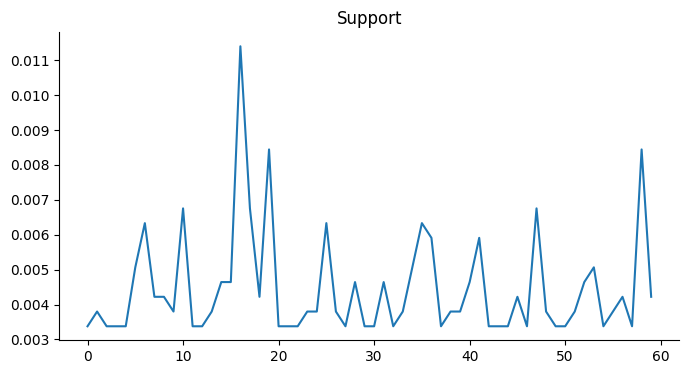

In [192]:
from matplotlib import pyplot as plt
_df_51['Support'].plot(kind='line', figsize=(8, 4), title='Support')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


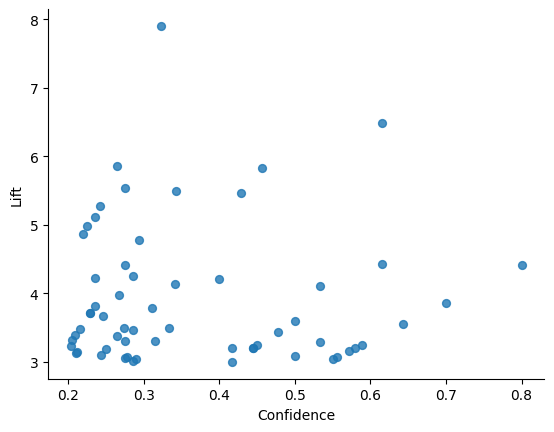

In [193]:
from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='Confidence', y='Lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)